This tutorial shows how to download specific or all datasets from DIGEN and perform benchmarking of an exemplary method on DIGEN benchmark. In this tutorial a deep learning network (multilayer perceptron) was used as a classifier.

For clarity, the method with its hyperparameters was put to a separate file (MLPClassifier.py). As computations may take exceeding amount of time, we have benchmarked the methods on the DIGEN and stored everything in mlp.pkl file.


In [1]:
# Loading digen library
from digen import Benchmark

In [2]:
#Downloading a specific dataset
benchmark=Benchmark()
benchmark.load_dataset('digen8')

#Download all the datasets from github like this:
#for i in range(1,41):
#    benchmark.load_dataset('digen'+str(i))

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,target
0,-0.492688,1.695323,-0.463880,-0.601031,-2.452446,0.256386,-0.364810,0.360809,-0.077216,-0.937909,1
1,0.330755,1.235786,1.424151,-0.425144,-0.366120,-0.608856,1.090645,-0.356239,1.830351,-1.746820,0
2,0.172737,-1.658412,-0.885674,-0.815369,0.430924,2.282347,0.518802,0.373944,0.601736,2.361547,0
3,-0.143129,-2.232252,0.744914,0.682386,-1.092925,1.065166,-0.857487,1.123311,1.491142,-1.253732,0
4,2.852009,1.100497,0.051269,-0.489391,0.457550,-0.288232,0.425169,-0.280466,0.377116,0.377973,0
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.670036,0.862090,-0.208514,-0.366865,-0.834835,-1.563298,0.263910,-0.372874,-0.994354,-1.023974,0
996,-0.168980,0.856737,-0.714346,-0.651987,0.307338,-0.038337,-1.318779,0.578688,1.903647,0.121934,0
997,0.199206,-0.276444,0.053857,1.474468,-0.223547,-0.081279,0.670520,0.725530,0.018321,0.153119,0
998,0.894915,-0.701973,-0.030525,-0.950064,0.129887,0.630884,-0.630708,0.572413,0.986387,0.311660,0


In [3]:
#launch hyper-parameter tuning for MLP on a specific dataset (here only showing a couple of trials)
%run -i 'MLPClassifier.py' -d digen8


[I 2022-04-25 13:02:06,309] A new study created in RDB with name: digen8_4426-MLPClassifier


Optimizing MLPClassifier on digen8_4426


[I 2022-04-25 13:02:07,162] Trial 0 finished with value: 0.52625 and parameters: {'n_layers': 3, 'n_neurons_0': 58, 'n_neurons_1': 23, 'n_neurons_2': 33, 'activation': 'identity', 'solver': 'lbfgs', 'alpha': 0.0007743587722160843}. Best is trial 0 with value: 0.52625.
[I 2022-04-25 13:02:21,776] Trial 1 finished with value: 0.5312500000000001 and parameters: {'n_layers': 3, 'n_neurons_0': 12, 'n_neurons_1': 16, 'n_neurons_2': 62, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.23335197609938557}. Best is trial 1 with value: 0.5312500000000001.
[I 2022-04-25 13:02:32,912] Trial 2 finished with value: 0.51375 and parameters: {'n_layers': 2, 'n_neurons_0': 75, 'n_neurons_1': 96, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.11370619691403278}. Best is trial 1 with value: 0.5312500000000001.
[I 2022-04-25 13:02:55,931] Trial 3 finished with value: 0.8400000000000001 and parameters: {'n_layers': 3, 'n_neurons_0': 80, 'n_neurons_1': 69, 'n_neurons_2': 48, 'activation': 'relu', 'so

In [4]:
#Loading the results - all the trials for all the datasets
import pickle
results=pickle.load(open('mlp.pkl','rb'))


(<seaborn.matrix.ClusterGrid at 0x7f3bc04641f0>, None)

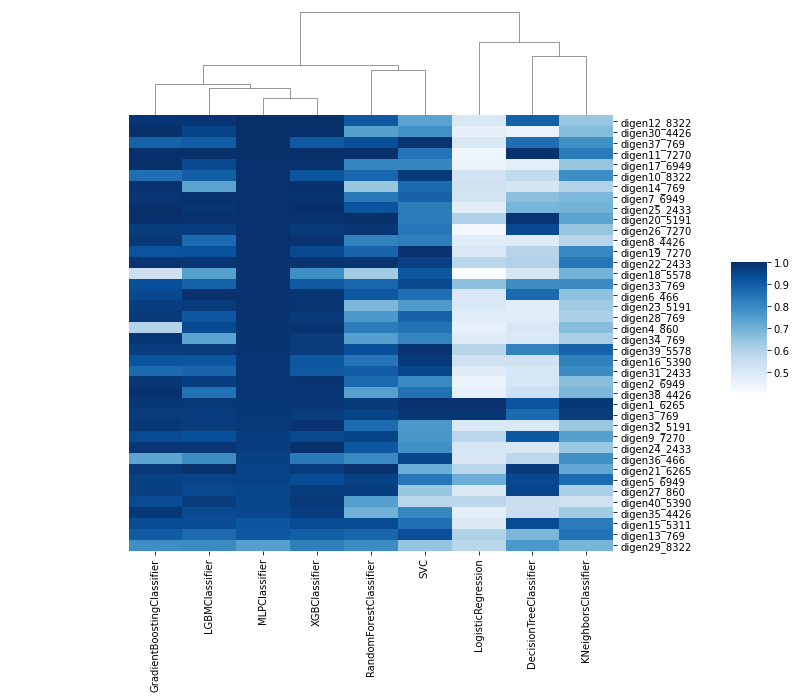

In [6]:
#Visualizing performance of MLP using heatmap
import matplotlib.pyplot as plt

benchmark.plot_heatmap(new_results=results)
#plt.savefig('mlp-heatmap.eps', bbox_inches='tight')

In [7]:
import pandas as pd 
df = pd.DataFrame.from_dict(benchmark.data)

In [8]:
#Preparing results for the number of victories visualization - we need to delete 'name' property and set its name
df = pd.DataFrame.from_dict(results).drop('name', axis=1).transpose()
df['classifier']='MLPClassifier'

In [9]:
#Loading default methods and adding to comparison
df=df.append(benchmark.data)

In [10]:
#Creating number of victories chart. For that, we need to put classifiers in columns
df = df.pivot('dataset', columns='classifier', values='auroc')


In [11]:
#we are applying 0.001 threshold to round the scores
df = df.astype(float).round(3)

Now we will create a win-lose chart showing how many times a method in row outperformed a method in column by more than 0.001

<AxesSubplot:>

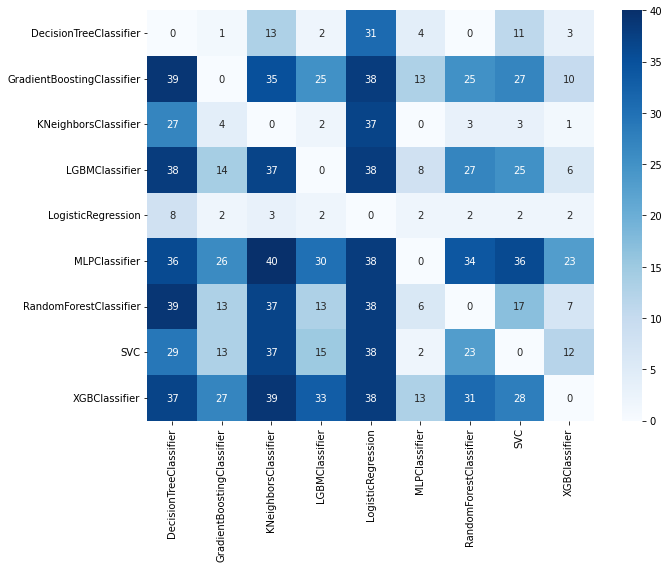

In [12]:
from itertools import product
import seaborn as sns

algorithms = list(df.columns)
wins = pd.DataFrame(index=algorithms, columns=algorithms)

for alg1, alg2 in product(algorithms, algorithms):
    wins.loc[alg1, alg2] = (df[alg1] > df[alg2]).sum()

    
fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=wins.astype(int), annot=True, cmap="Blues")
#plt.savefig('mlp-duels.svg', bbox_inches='tight')

As we can see, a tuned MLP performed really well on DIGEN benchmark. It won even against XGBoost on 23 datasets, noticing 13 loses. For the remaining datasets, MLP and XGBoost tied (their performance didn't differ for more than 0.001).

In [ ]:
#Credits to Paweł Renc for his help in duels chart visualization 